In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path ke file
file_path = "C:\\Users\\USER\\Downloads\\loan_data_set.xlsx"

# Membaca dataset dari file Excel
data = pd.read_excel(file_path)  # Perbaikan di sini

# Membersihkan data (contoh sederhana)
data = data.dropna(subset=['Married', 'Dependents', 'Property_Area', 'ApplicantIncome', 'Education', 'Loan_Status'])
data['Dependents'] = data['Dependents'].replace('3+', '3').astype(float)
data['ApplicantIncome'] = pd.to_numeric(data['ApplicantIncome'], errors='coerce')
data = data.dropna(subset=['ApplicantIncome'])

# Menampilkan 5 baris pertama untuk konfirmasi
print(data.head())


    Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No         0.0      Graduate            No   
1  LP001003   Male     Yes         1.0      Graduate            No   
2  LP001005   Male     Yes         0.0      Graduate           Yes   
3  LP001006   Male     Yes         0.0  Not Graduate            No   
4  LP001008   Male      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         NaN             360.0   
1             4583               1508       128.0             360.0   
2             3000                  0        66.0             360.0   
3             2583               2358       120.0             360.0   
4             6000                  0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [50]:
# Menghitung total nasabah
total_nasabah = len(data)

# Menghitung nasabah yang memenuhi kriteria
kriteria_a = data[(data['Married'] == 'Yes') & (data['Dependents'] > 1)]
jumlah_a = len(kriteria_a)

# Menghitung probabilitas
prob_a = jumlah_a / total_nasabah

print("\nHasil Perhitungan:")
print(f"Probabilitas nasabah menikah dengan tanggungan >1: {prob_a:.2%}")


Hasil Perhitungan:
Probabilitas nasabah menikah dengan tanggungan >1: 22.87%


In [45]:
# Menghitung rata-rata penghasilan
rata_penghasilan = data['ApplicantIncome'].mean()

# Menghitung nasabah yang memenuhi kriteria
kriteria_b = data[(data['Property_Area'] == 'Urban') & 
                 (data['ApplicantIncome'] > rata_penghasilan)]
jumlah_b = len(kriteria_b)

# Menghitung probabilitas
prob_b = jumlah_b / total_nasabah

print("\nHasil Perhitungan:")
print(f"Probabilitas nasabah di urban dengan penghasilan di atas rata-rata: {prob_b:.2%}")
print(f"Rata-rata penghasilan: {rata_penghasilan:.2f}")



Hasil Perhitungan:
Probabilitas nasabah di urban dengan penghasilan di atas rata-rata: 9.35%
Rata-rata penghasilan: 5408.86


<Figure size 1000x600 with 0 Axes>

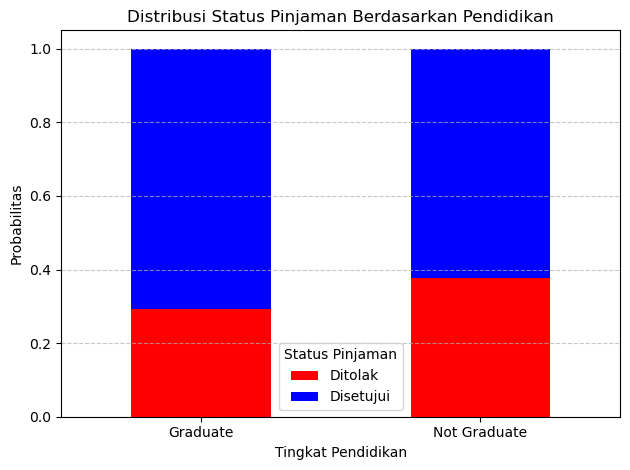

In [54]:
# Menghitung probabilitas bersyarat Loan_Status berdasarkan Education
prob_by_edu = data.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack()

# Visualisasi
plt.figure(figsize=(10, 6))
prob_by_edu.plot(kind='bar', stacked=True, color=['red','blue'])
plt.title('Distribusi Status Pinjaman Berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Probabilitas')
plt.xticks(rotation=0)
plt.legend(title='Status Pinjaman', labels=['Ditolak', 'Disetujui'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
